In [143]:
import numpy as np
import matplotlib.pyplot as plt

from Rock_Paper_Scissors import RockPaperScissors
from MinimaxQPlayer import MinimaxQPlayer, RandomPlayer

import warnings

warnings.filterwarnings('ignore')

In [144]:
class Tester:
    def __init__(self, game, numStates, numActions, drawProbability, P, decay, typeA, typeB):
        self.game = game
        self.numStates = numStates
        self.numActions = numActions
        self.drawProbability = drawProbability
        self.P = P
        self.decay = decay
        
        # saved 
        self.A = []
        self.B = []
        self.rewards = []
        self.wins = []

        if typeA == MinimaxQPlayer:
            self.playerA = typeA(numStates, numActions, numActions, decay=decay, expl=0.01, gamma=1-drawProbability)
        
        if typeB == MinimaxQPlayer:
            self.playerB = typeB(numStates, numActions, numActions, decay=decay, expl=0.9, gamma=1-drawProbability)
        elif typeB == RandomPlayer:
            self.playerB = RandomPlayer(numActions, p=[0.9, 0.05, 0.05])
    
    def iterations(self, num):
        A = []
        B = []
        rewards = []
        wins = np.zeros(num)

        for i in np.arange(num):
            if (i % (num / 10) == 0):
                print("%d%%" % (i * 100 / num))
                self.game.restart()
            
            result = -1
            while result == -1:
                # single game 
                state = 0
                newState = 0
                # choose actions
                actionA = self.playerA.chooseAction(0)
                actionB = self.playerB.chooseAction(0)
                # get result and update
                result = self.game.play(actionA, actionB)
                reward = self.game.P[actionA, actionB]
                self.playerA.getReward(state, newState, [actionA, actionB], reward)
                self.playerB.getReward(state, newState, [actionB, actionA], -reward)
           
            # save the result
            A.extend([actionA])
            B.extend([actionB])
            rewards.extend([reward])
            wins[i] = result
        
        self.A = A
        self.B = B
        self.rewards = rewards
        self.wins = wins
    
    def plotPolicy(self, player):
        print("================player================")
        for state in range(player.numStates):
            print("\n=================")
            self.game.draw()
            print(player.Q[state])
            player.policyForState(state)   
    
    def plotResults(self):
        wins = np.array(self.wins)
        
        print("================Results================")
        
        print("Wins A : %d" % (wins == 0).sum())
        print("Wins B : %d" % (wins == 1).sum())
        print("Draws  : %d" % (wins == -2).sum())

        print("Reward A : %d" % sum(self.rewards))
        print("Reward B : %d" % -sum(self.rewards))

        print("\n==============")
        print("A - action 0: %f" % (1. * sum(np.array(self.A) == 0) / len(self.A)))
        print("A - action 1: %f" % (1. * sum(np.array(self.A) == 1) / len(self.A)))
        print("A - action 2: %f" % (1. * sum(np.array(self.A) == 2) / len(self.A)))

        print("\n==============")
        print("B - action 0: %f" % (1. * sum(np.array(self.B) == 0) / len(self.B)))
        print("B - action 1: %f" % (1. * sum(np.array(self.B) == 1) / len(self.B)))
        print("B - action 2: %f" % (1. * sum(np.array(self.B) == 2) / len(self.B)))

        plt.plot((wins == 0).cumsum())
        plt.plot((wins == 1).cumsum())
        plt.legend(('Wins A', 'Wins B'), loc=(0.6, 0.8))
        plt.figure()
        plt.plot(np.array(self.rewards).cumsum())
        plt.plot(-np.array(self.rewards).cumsum())
        plt.legend(('Reward A', 'Reward B'), loc=(0.4, 0.8))
        plt.show()

0%
10%
20%
30%
40%
50%
60%
70%
80%
90%
================player================

[[ 0 -1  1]
 [ 1  0 -1]
 [-1  1  0]]
[[ 8.13381491e-05 -9.99922286e-01  1.00009840e+00]
 [ 1.00008452e+00  8.17857337e-05 -9.99921625e-01]
 [-9.99917600e-01  1.00008642e+00  8.87350375e-05]]
Actions 0 : 0.333331
Actions 1 : 0.333335
Actions 2 : 0.333334
================Results================
Wins A : 334
Wins B : 337
Draws  : 329
Reward A : -3
Reward B : 3

A - action 0: 0.346000
A - action 1: 0.334000
A - action 2: 0.320000

B - action 0: 0.314000
B - action 1: 0.338000
B - action 2: 0.348000


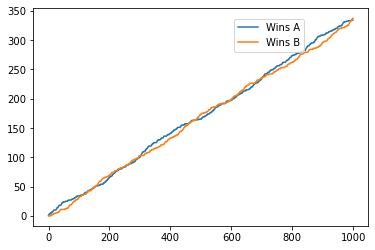

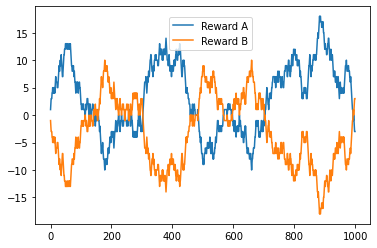

In [146]:
if __name__ == "__main__":
    num = 1000
    P = [[0, -1, 1], [1, 0, -1], [-1, 1, 0]]
    decay = 10**(-2. / num * 0.05)
    tester = Tester(RockPaperScissors(P), 1, 3, 0.1, P, decay, MinimaxQPlayer, MinimaxQPlayer)
    tester.iterations(num)
    tester.plotPolicy(tester.playerA)
    # tester.plotPolicy(tester.playerB)
    tester.plotResults()